In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('../data/Handball Woman European Data Set.xlsx')

In [9]:
df.dtypes

Unnamed: 0      int64
Phase          object
Match          object
Team           object
No              int64
Name           object
Goals           int64
Shots           int64
%               int64
7m%             int64
7mPGoals        int64
7mPMissed       int64
6mCGoals        int64
6mCMissed       int64
WingGoals       int64
WingMissed      int64
BTGoals         int64
BTMissed        int64
FBGoals         int64
FBMissed        int64
FTOGoals        int64
FTOMissed       int64
9mGoals         int64
9mMissed        int64
YC              int64
RC              int64
2M              int64
2+2             int64
AS              int64
R7              int64
ST              int64
BS              int64
P7              int64
TO              int64
Time          float64
scoring       float64
MVP             int64
dtype: object

In [ ]:
# TODO: Juntar los datos por jugadoras haciendo la suma

In [25]:
df2 = df[['Goals', 'Shots']]
df2

,Goals,Shots
0,1,1
1,1,1
2,3,3
3,0,1
4,2,6
...,...,...
1495,0,0
1496,0,0
1497,3,4
1498,1,2


In [15]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(df2)

In [26]:
datanorm = df2

In [27]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(datanorm)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(datanorm, labels))

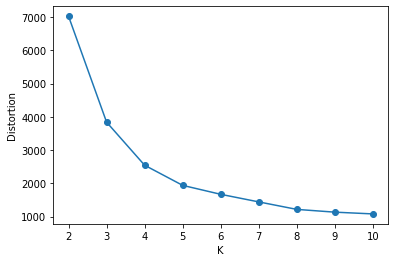

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

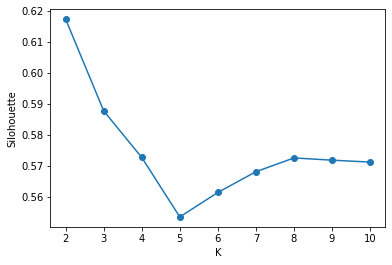

In [29]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

In [30]:
k = 5

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(datanorm)

In [31]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.554
Distortion: 1936.52


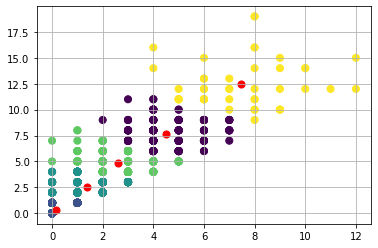

In [35]:
#plotting orginal points with color related to label
#plt.scatter(datanorm[:,0], datanorm[:,1], c=km.labels_,s=50)
plt.scatter(datanorm['Goals'], datanorm['Shots'], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red',s=50)
# 
plt.grid()
plt.show()
      